# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-bv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p0_s1_2016-11-14_1456
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p0_s2_2016-11-15_1327
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p0_s3_2016-11-15_1338
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p1_s1_2016-11-15_1615
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p1_s2_2016-11-15_1623
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p1_s3_2016-11-15_1636
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p2_s1_2016-12-12_1539
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p2_s2_2016-12-12_1545
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p2_s3_2016-12-12_1549
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p3_s1_2016-11-18_1444
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p3_s2_2016-11-18_1454
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-bv\mcEcc_ct-bv_p3

Transforming the data set first.

In [3]:
ds.BvL = np.round(ds.BvL*60/35,1)
ds.BvR = np.round(ds.BvR*60/35,1)
ds['bvDiff'] = abs(ds['BvR'] - ds['BvL'])
ds['bvMin'] = np.amin([ds['BvL'], ds['BvR']], axis=0)
ds['bvMax'] = np.amax([ds['BvL'], ds['BvR']], axis=0)
#ds['tfMin'] = ds.bvMin
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
# The minimum size of the ring in the old paradigm corresponded to full field, so recoding:
ds.ix[ds['ringSz']>=252,'ringSz'] = 252
ds['ringSzDeg'] = np.round(ds.ringSz/35,1)
# The full-field should be coded as 'no center-surround', or 'no ring':
ds['ring'] = 0
ds.ix[ds.ringSz<252,'ring'] = 1
print ds.head(5)

   BsfL  BsfR   BvL  BvR     colorL     colorR  dirL  dirR      expName  \
0  0.05  0.05   0.0  2.1  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
1  0.05  0.05   1.0  0.0  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
2  0.05  0.05  16.5  4.1  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
3  0.05  0.05   2.1  0.5  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
4  0.05  0.05   0.5  0.0  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   

   fovFade  ...              time  trialN  trialT  vL  vR  bvDiff  bvMin  \
0        2  ...   2016-11-14_1456       1       1   0   0     2.1    0.0   
1        2  ...   2016-11-14_1456       2       1   0   0     1.0    0.0   
2        2  ...   2016-11-14_1456       3       1   0   0    12.4    4.1   
3        2  ...   2016-11-14_1456       4       1   0   0     1.6    0.5   
4        2  ...   2016-11-14_1456       5       1   0   0     0.5    0.0   

   bvMax  ringSzDeg  ring  
0    2.1        7.2     0  
1    1.0        0.9     1  
2   16.5

## Visualization

### Proportion of trials

In [4]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0   40  0.158730  0.366151   252
1            1  131  0.519841  0.500600   252
2            2   70  0.277778  0.448795   252
3            3  109  0.429134  0.495930   254
Fast (left):
   participant  sum      mean       std  size
0            0  125  0.496032  0.500979   252
1            1   84  0.333333  0.472343   252
2            2  139  0.551587  0.498321   252
3            3  118  0.464567  0.499728   254
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   87  0.345238  0.476392   252
1            1   37  0.146825  0.354636   252
2            2   22  0.087302  0.282838   252
3            3   27  0.106299  0.308829   254


#### Slow center or whole field

(-0.1, 1.1)

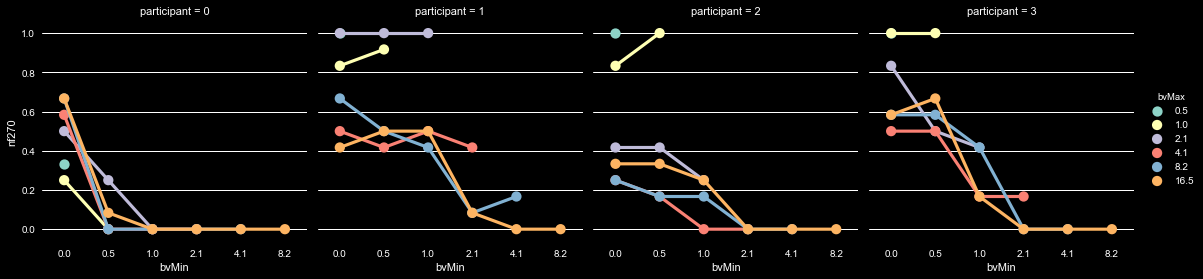

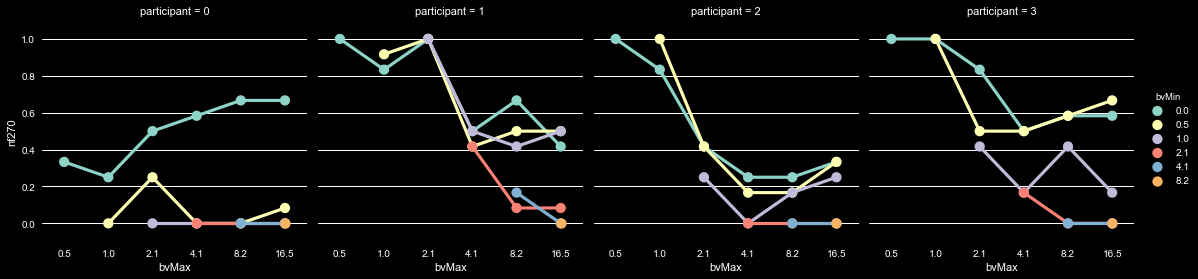

In [8]:
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMax', y='nf270', hue='bvMin', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Slow center (down)

(-0.1, 1.1)

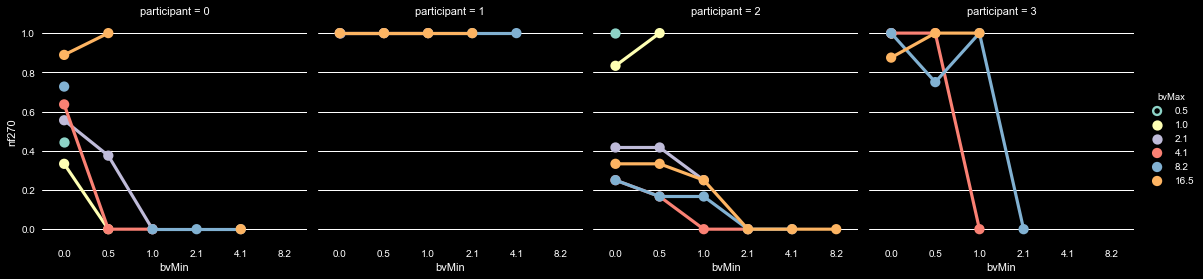

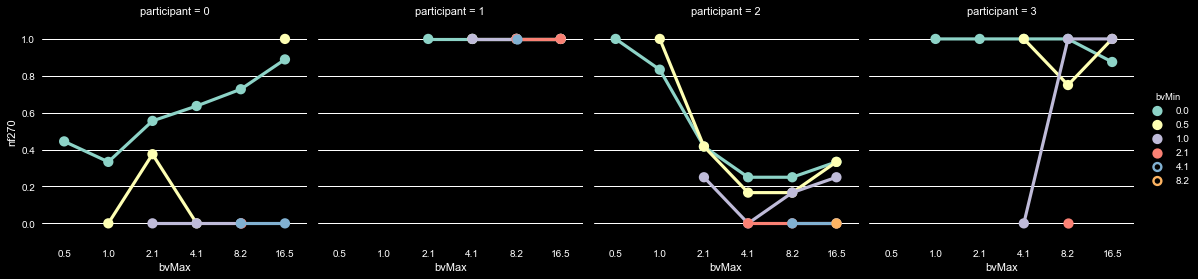

In [6]:
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[ds.ring==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMax', y='nf270', hue='bvMin', col='participant', col_wrap=4,
                   data=ds[ds.ring==1], ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Slow whole-field

(-0.1, 1.1)

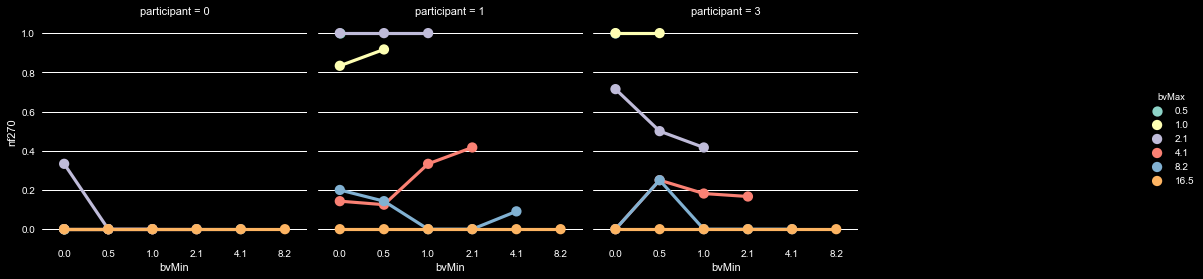

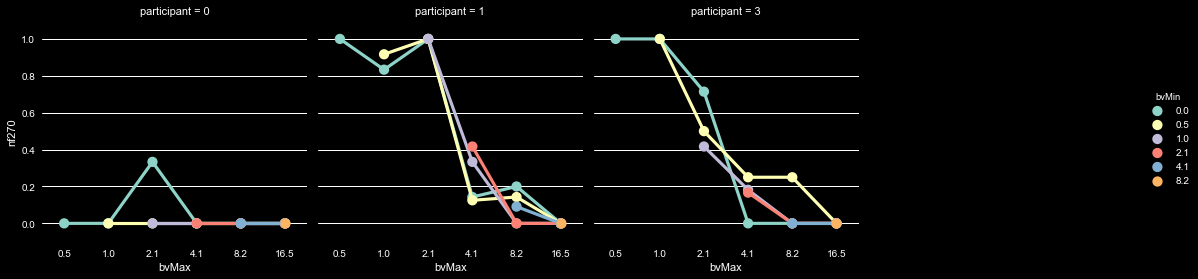

In [7]:
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[ds.ring==0], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMax', y='nf270', hue='bvMin', col='participant', col_wrap=4,
                   data=ds[ds.ring==0], ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Fast center or whole field (left)

(-0.1, 1.1)

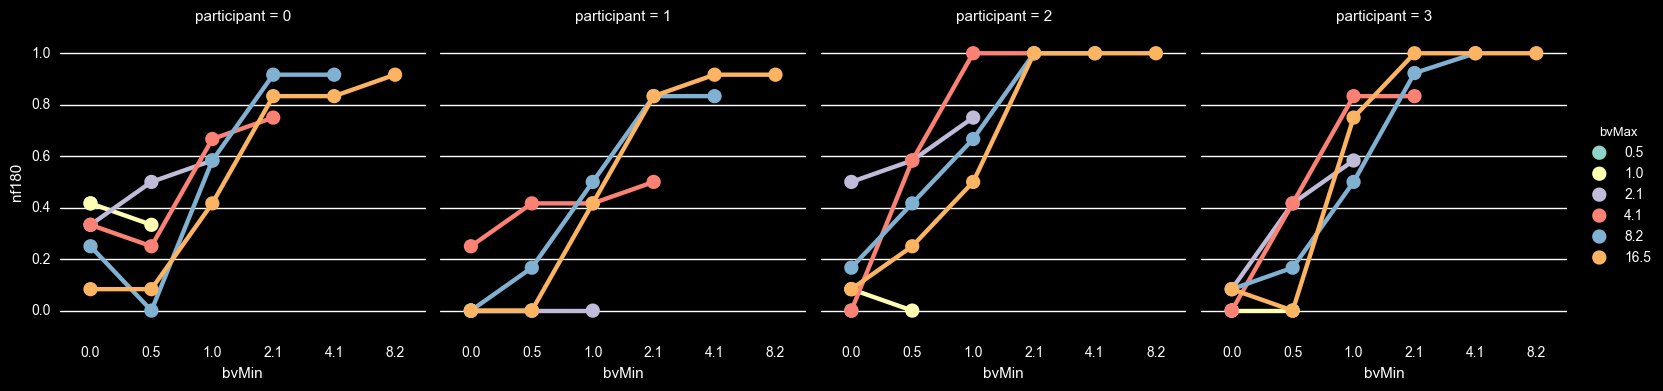

In [18]:
g = sns.factorplot(x='bvMin', y='nf180', hue='bvMax', col='participant', col_wrap=4, 
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

As the velocity bandwidth increases, the dominance of fast velocity is more obvious.

(-0.1, 1.1)

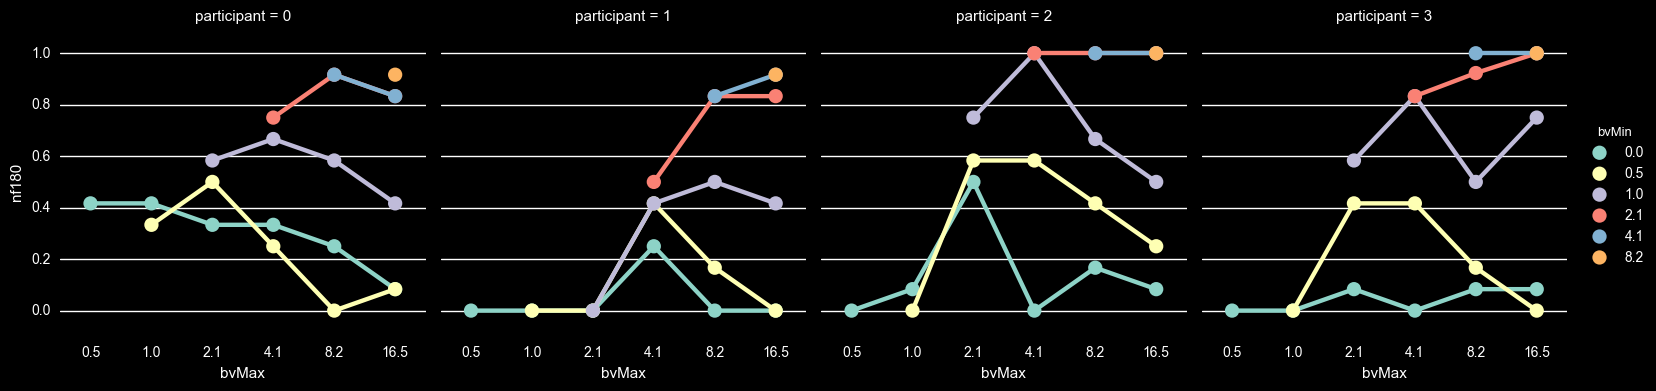

In [19]:
g = sns.factorplot(x='bvMax', y='nf180', hue='bvMin', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Patchy/transparent (up)

(-0.1, 1.1)

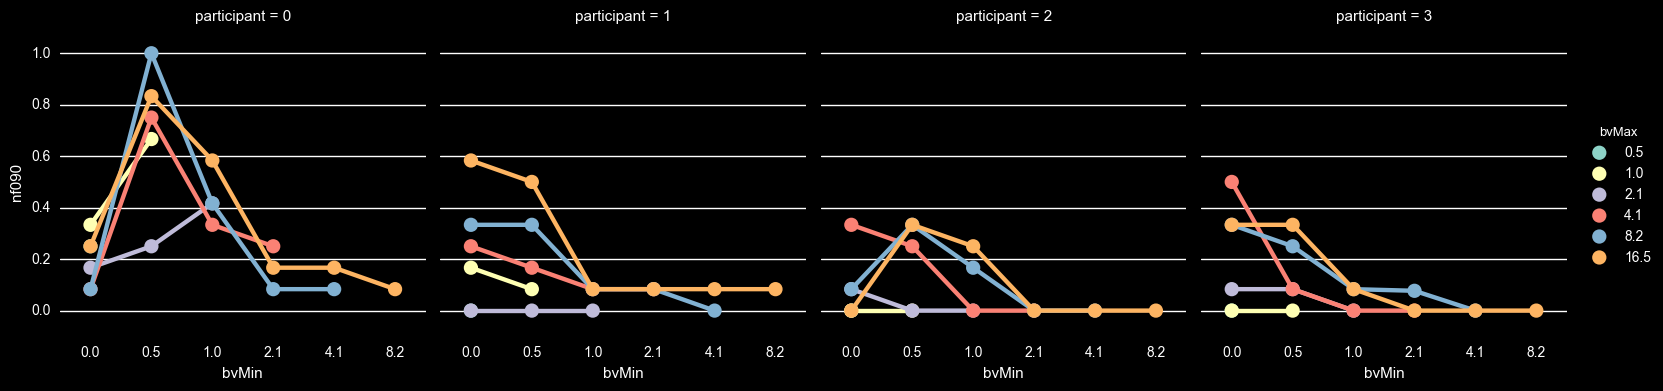

In [20]:
g = sns.factorplot(x='bvMin', y='nf090', hue='bvMax', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

At the intermediate velocity bandwidth of .3, there are many 'patchy' trials. This occurs whenever one of the competing patterns is fast (2.4 or above).

(-0.1, 1.1)

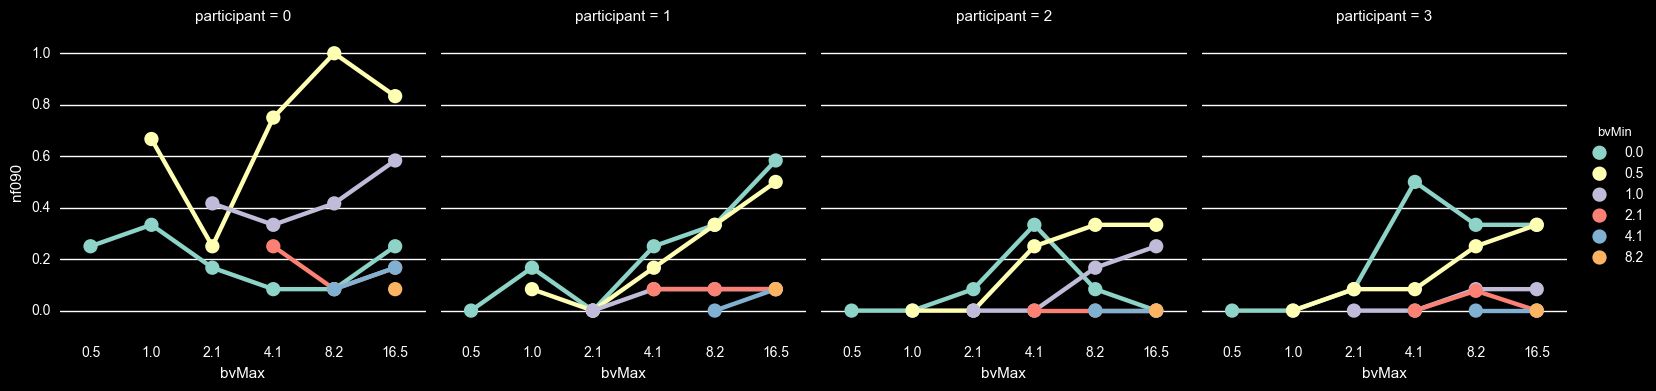

In [21]:
g = sns.factorplot(x='bvMax', y='nf090', hue='bvMin', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

### Ring size

#### Slow (down)

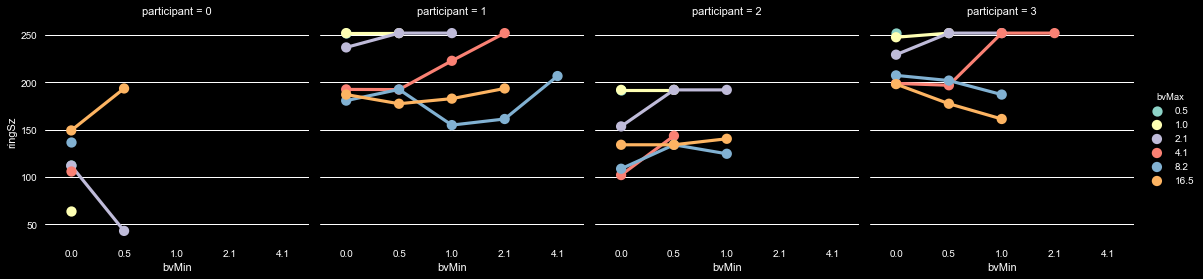

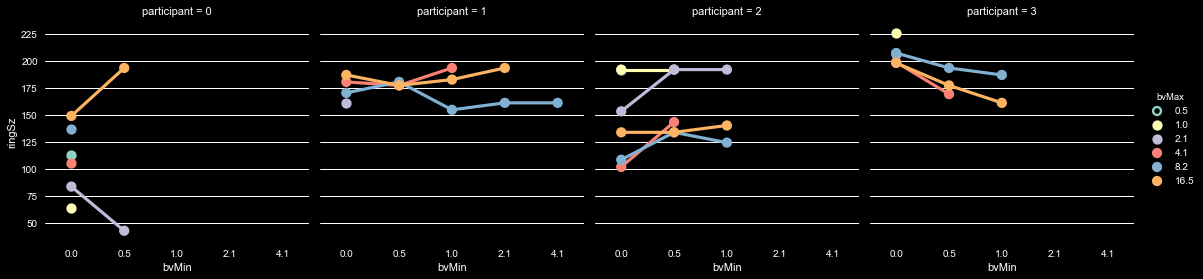

In [9]:
#ss = ds[ds.nf270==1]
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[ds.nf270==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[(ds.nf270==1) & (ds.ring==1)], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

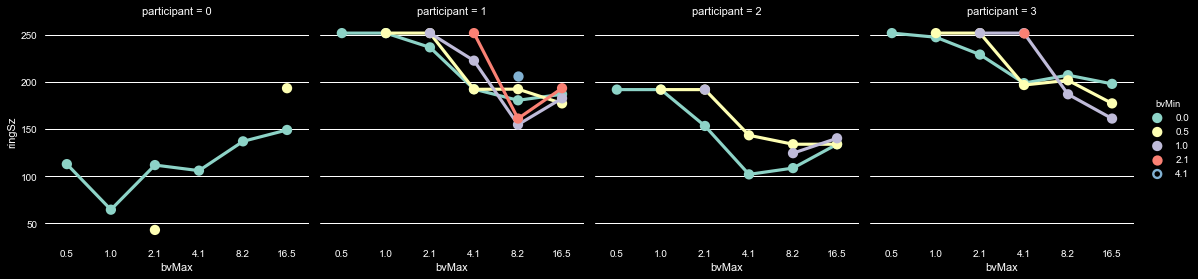

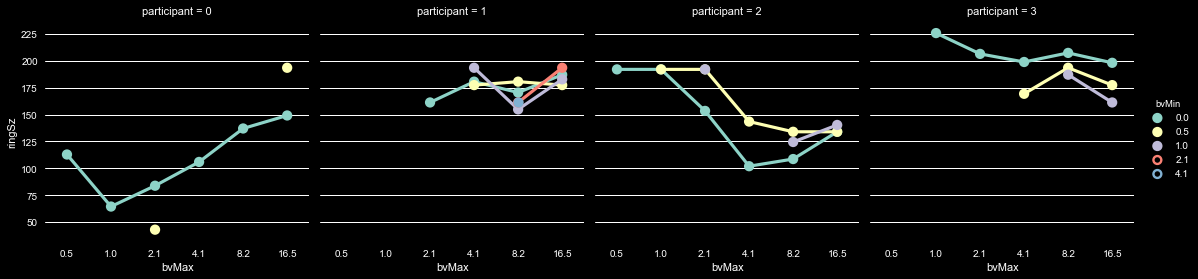

In [10]:
g = sns.factorplot(x='bvMax', y='ringSz', hue='bvMin', col='participant', col_wrap=4,
                   data=ds[ds.nf270==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMax', y='ringSz', hue='bvMin', col='participant', col_wrap=4,
                   data=ds[(ds.nf270==1) & (ds.ring==1)], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

#### Fast (left)

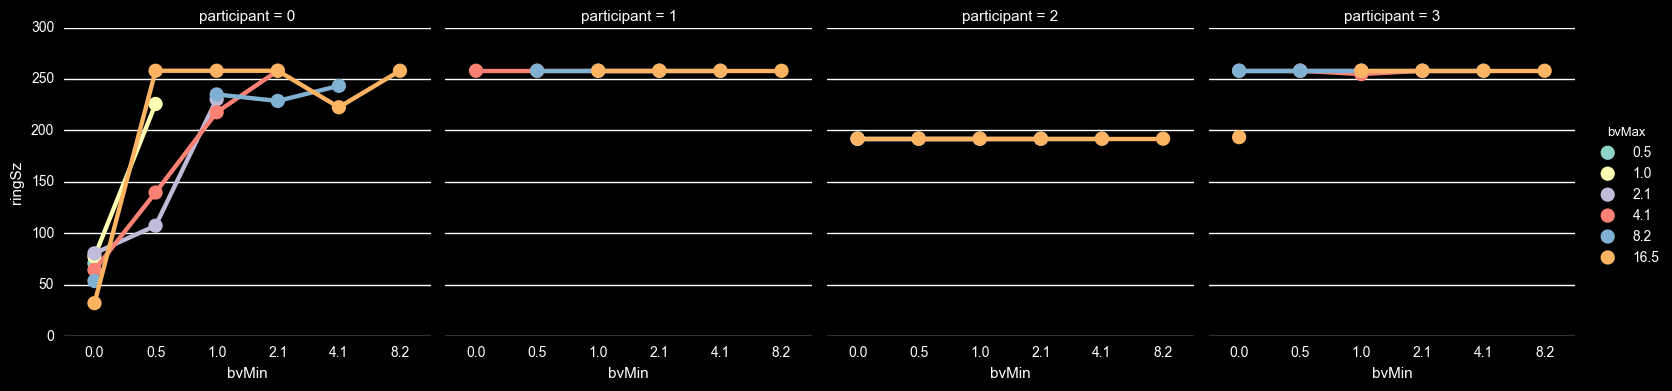

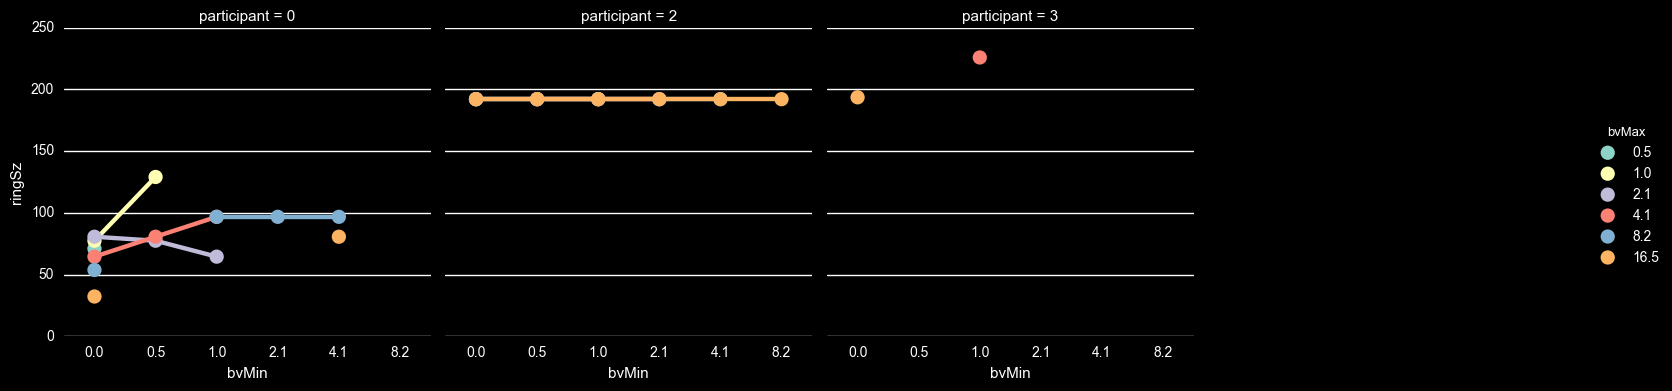

In [25]:
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[ds.nf180==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[(ds.nf180==1) & (ds.ring==1)], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

Meaningfully, the size of the fast-center quickly saturates to the maximum as the tf of both stimuli increases. I.e., the fast-center is still present for intermediate-to-low tf, but only when they are competing with another low-tf stimulus.

#### Patchy/transparent

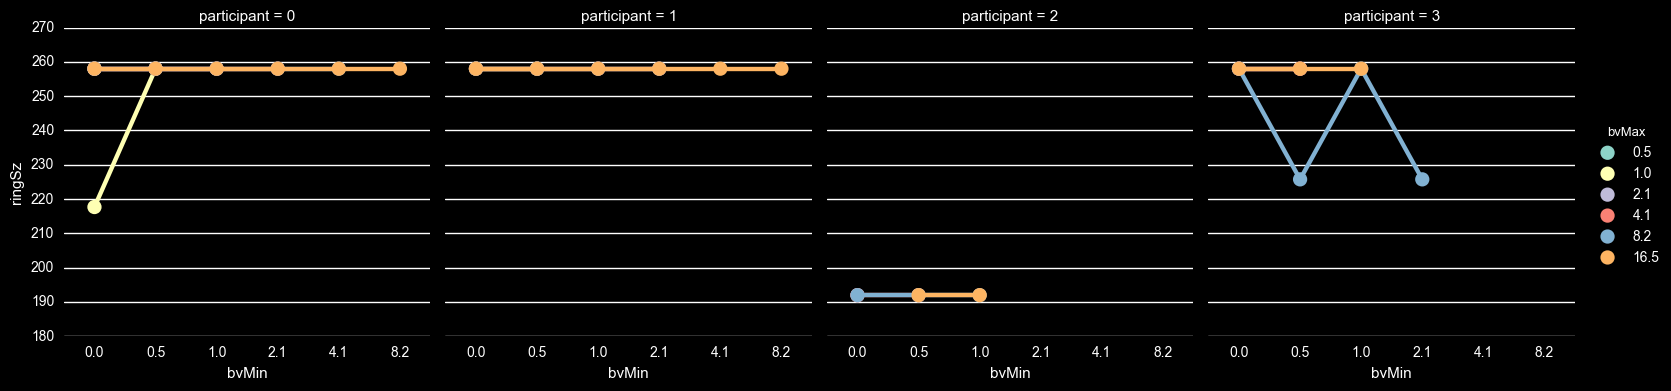

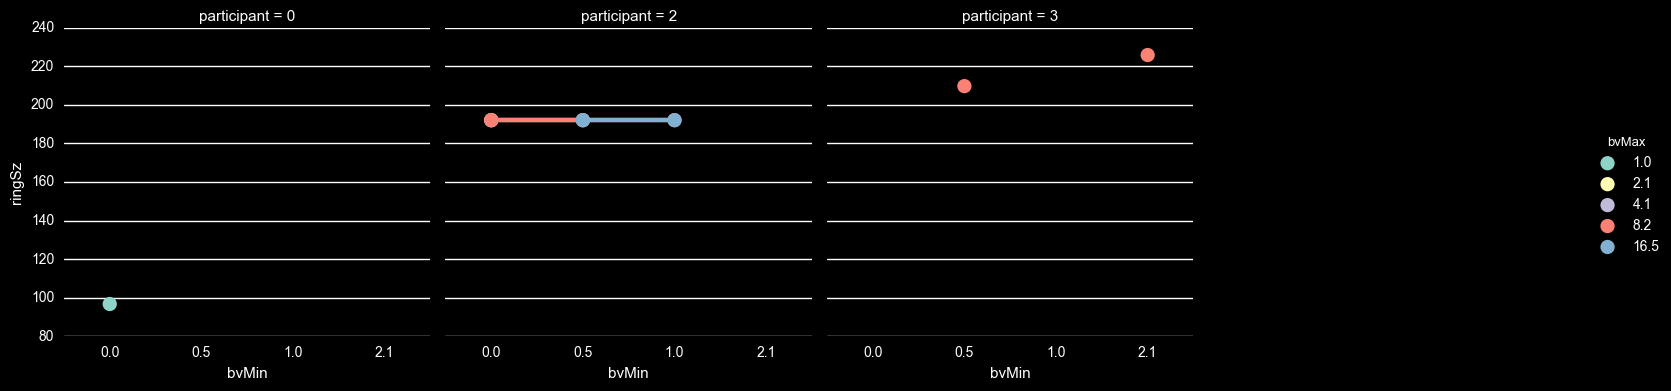

In [26]:
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[ds.nf090==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=4,
                   data=ds[(ds.nf090==1) & (ds.ring==1)], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

## Types of responses

In [25]:
ds['slowCenter'] = 0
ds.ix[(ds.nf270==1) & (ds.ring==1),'slowCenter'] = 1
ds['fastCenter'] = 0
ds.ix[(ds.nf180==1) & (ds.ring==1),'fastCenter'] = 1
ds['slowWhole'] = 0
ds.ix[(ds.nf270==1) & (ds.ring==0),'slowWhole'] = 1
ds['fastWhole'] = 0
ds.ix[(ds.nf180==1) & (ds.ring==0),'fastWhole'] = 1
ds['patchy'] = 0
ds.ix[ds.nf090==1,'patchy'] = 1

### bvMin

In [26]:
summary = ds.groupby(['participant','bvMin'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMin'] = summary.bvMin
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMin'])
sumVmin = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmin.head(5)

,participant,bvMin,response,proportion trials
0,0,0.0,slowCenter,0.486111
1,0,0.5,slowCenter,0.066667
2,0,1.0,slowCenter,0.000000
3,0,2.1,slowCenter,0.000000
4,0,4.1,slowCenter,0.000000


(-0.1, 1.1)

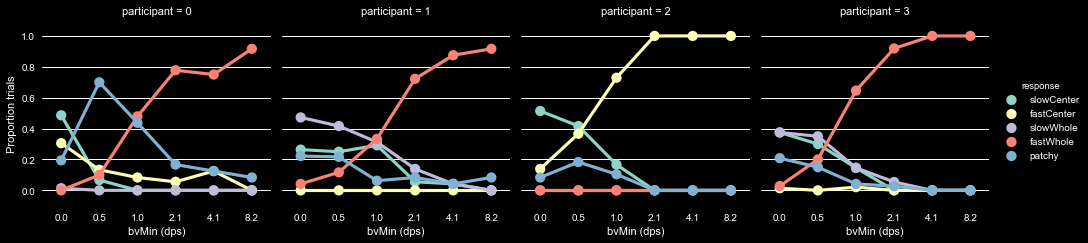

In [27]:
g = sns.factorplot(x='bvMin', y='proportion trials', hue='response', col='participant', data=sumVmin, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMin (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

### bvMax

In [28]:
summary = ds.groupby(['participant','bvMax'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMax'] = summary.bvMax
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMax'])
sumVmax = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmax.head(5)

,participant,bvMax,response,proportion trials
0,0,0.5,slowCenter,0.333333
1,0,1.0,slowCenter,0.125000
2,0,2.1,slowCenter,0.222222
3,0,4.1,slowCenter,0.145833
4,0,8.2,slowCenter,0.133333


(-0.1, 1.1)

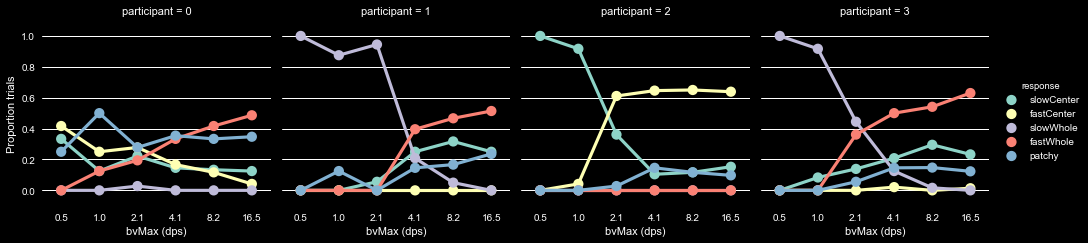

In [29]:
g = sns.factorplot(x='bvMax', y='proportion trials', hue='response', col='participant', data=sumVmax, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMax (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

### bvDiff

In [31]:
summary = ds.groupby(['participant','bvDiff'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvDiff'] = summary.bvDiff
sumPtnts['slowCenter'] = summary.slowCenter['mean']
sumPtnts['fastCenter'] = summary.fastCenter['mean']
sumPtnts['slowWhole'] = summary.slowWhole['mean']
sumPtnts['fastWhole'] = summary.fastWhole['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvDiff'])
sumVdiff = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVdiff.head(5)

,participant,bvDiff,response,proportion trials
0,0,0.5,slowCenter,0.166667
1,0,1.0,slowCenter,0.250000
2,0,1.1,slowCenter,0.000000
3,0,1.6,slowCenter,0.250000
4,0,2.0,slowCenter,0.000000


(-0.1, 1.1)

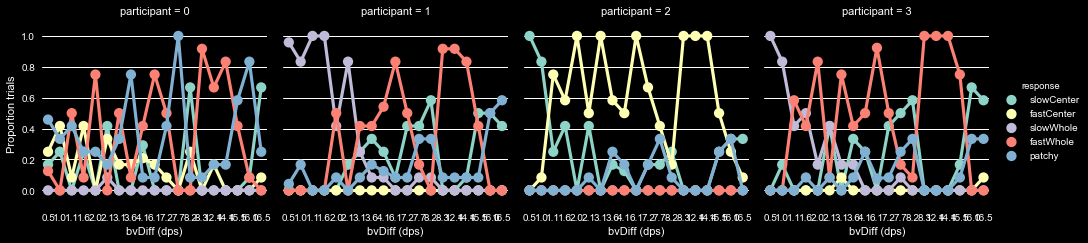

In [32]:
g = sns.factorplot(x='bvDiff', y='proportion trials', hue='response', col='participant', data=sumVdiff, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvDiff (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

## Types of responses: Trial count

### bvMin

In [37]:
summary = ds.groupby(['participant','bvMin'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.sum]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMin'] = summary.bvMin
sumPtnts['slowCenter'] = summary.slowCenter['sum']
sumPtnts['fastCenter'] = summary.fastCenter['sum']
sumPtnts['slowWhole'] = summary.slowWhole['sum']
sumPtnts['fastWhole'] = summary.fastWhole['sum']
sumPtnts['patchy'] = summary.patchy['sum']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMin'])
sumVmin = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'number of trials'})
sumVmin.head(5)

,participant,bvMin,response,number of trials
0,0,0.0,slowCenter,35
1,0,0.5,slowCenter,4
2,0,1.0,slowCenter,0
3,0,2.1,slowCenter,0
4,0,4.1,slowCenter,0


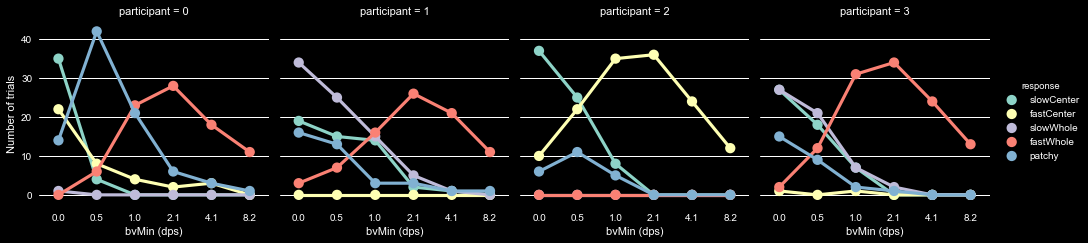

In [38]:
g = sns.factorplot(x='bvMin', y='number of trials', hue='response', col='participant', data=sumVmin, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMin (dps)','Number of trials')
#plt.ylim(-0.1,1.1)

### bvMax

In [39]:
summary = ds.groupby(['participant','bvMax'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.sum]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMax'] = summary.bvMax
sumPtnts['slowCenter'] = summary.slowCenter['sum']
sumPtnts['fastCenter'] = summary.fastCenter['sum']
sumPtnts['slowWhole'] = summary.slowWhole['sum']
sumPtnts['fastWhole'] = summary.fastWhole['sum']
sumPtnts['patchy'] = summary.patchy['sum']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMax'])
sumVmax = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'number of trials'})
sumVmax.head(5)

,participant,bvMax,response,number of trials
0,0,0.5,slowCenter,4
1,0,1.0,slowCenter,3
2,0,2.1,slowCenter,8
3,0,4.1,slowCenter,7
4,0,8.2,slowCenter,8


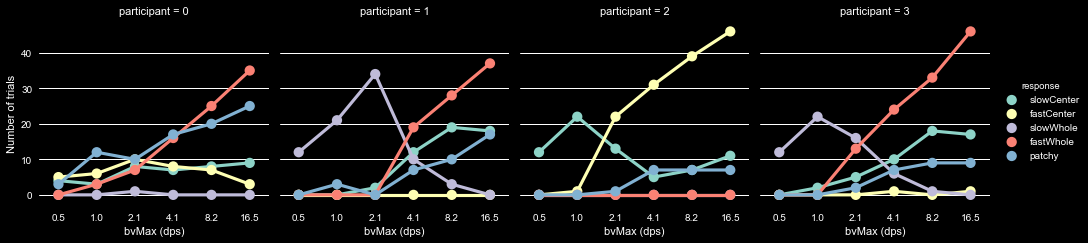

In [41]:
g = sns.factorplot(x='bvMax', y='number of trials', hue='response', col='participant', data=sumVmax, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMax (dps)','Number of trials')
#plt.ylim(-0.1,1.1)

### bvDiff

In [42]:
summary = ds.groupby(['participant','bvDiff'], as_index=False)['slowCenter','fastCenter','slowWhole','fastWhole','patchy'].agg([np.sum]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvDiff'] = summary.bvDiff
sumPtnts['slowCenter'] = summary.slowCenter['sum']
sumPtnts['fastCenter'] = summary.fastCenter['sum']
sumPtnts['slowWhole'] = summary.slowWhole['sum']
sumPtnts['fastWhole'] = summary.fastWhole['sum']
sumPtnts['patchy'] = summary.patchy['sum']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvDiff'])
sumVdiff = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'number of trials'})
sumVdiff.head(5)

,participant,bvDiff,response,number of trials
0,0,0.5,slowCenter,4
1,0,1.0,slowCenter,3
2,0,1.1,slowCenter,0
3,0,1.6,slowCenter,3
4,0,2.0,slowCenter,0


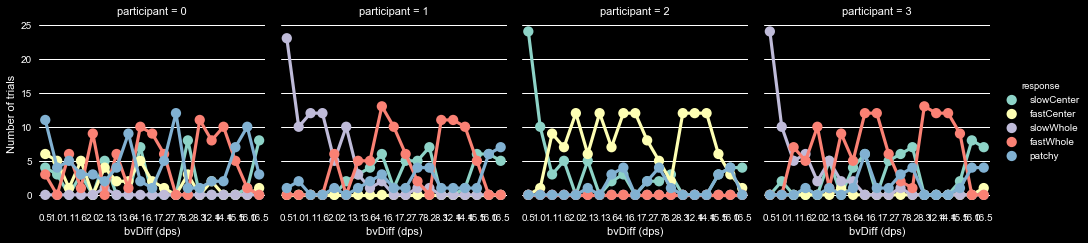

In [44]:
g = sns.factorplot(x='bvDiff', y='number of trials', hue='response', col='participant', data=sumVdiff, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvDiff (dps)','Number of trials')
#plt.ylim(-0.1,1.1)

## Slow / fast only: proportion

### bvMin

In [45]:
summary = ds.groupby(['participant','bvMin'], as_index=False)['nf180','nf270','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMin'] = summary.bvMin
sumPtnts['slow'] = summary.nf270['mean']
sumPtnts['fast'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMin'])
sumVmin = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmin.head(5)

,participant,bvMin,response,proportion trials
0,0,0.0,slow,0.500000
1,0,0.5,slow,0.066667
2,0,1.0,slow,0.000000
3,0,2.1,slow,0.000000
4,0,4.1,slow,0.000000


(-0.1, 1.1)

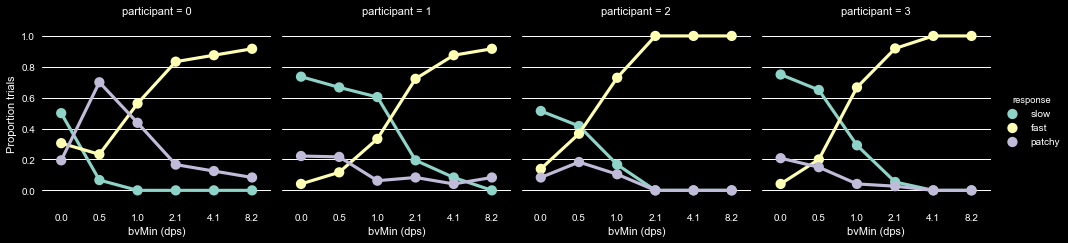

In [46]:
g = sns.factorplot(x='bvMin', y='proportion trials', hue='response', col='participant', data=sumVmin, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMin (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

### bvMax

In [47]:
summary = ds.groupby(['participant','bvMax'], as_index=False)['nf270','nf180','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvMax'] = summary.bvMax
sumPtnts['slow'] = summary.nf270['mean']
sumPtnts['fast'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvMax'])
sumVmax = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVmax.head(5)

,participant,bvMax,response,proportion trials
0,0,0.5,slow,0.333333
1,0,1.0,slow,0.125000
2,0,2.1,slow,0.250000
3,0,4.1,slow,0.145833
4,0,8.2,slow,0.133333


(-0.1, 1.1)

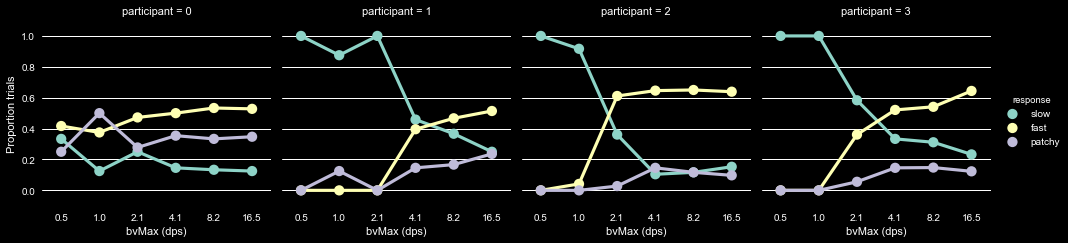

In [48]:
g = sns.factorplot(x='bvMax', y='proportion trials', hue='response', col='participant', data=sumVmax, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvMax (dps)','Proportion trials')
plt.ylim(-0.1,1.1)

### bvDiff

In [49]:
summary = ds.groupby(['participant','bvDiff'], as_index=False)['nf270','nf180','patchy'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['bvDiff'] = summary.bvDiff
sumPtnts['slow'] = summary.nf270['mean']
sumPtnts['fast'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.patchy['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','bvDiff'])
sumVdiff = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumVdiff.head(5)

,participant,bvDiff,response,proportion trials
0,0,0.5,slow,0.166667
1,0,1.0,slow,0.250000
2,0,1.1,slow,0.000000
3,0,1.6,slow,0.250000
4,0,2.0,slow,0.000000


(-0.1, 1.1)

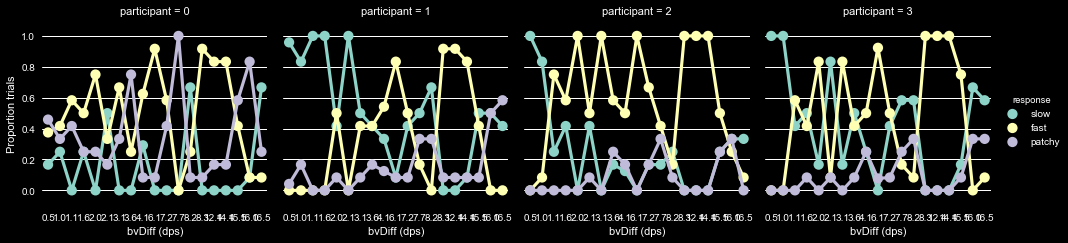

In [50]:
g = sns.factorplot(x='bvDiff', y='proportion trials', hue='response', col='participant', data=sumVdiff, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('bvDiff (dps)','Proportion trials')
plt.ylim(-0.1,1.1)